<h1>Лабораторная работа 2.</h1>
<h2>Часть 1. Метод дихотомии. Метод Ньютона.</h2>
<h2>Вариант А.</h2>

In [1]:
var('x')
f(x) = x^3 - 9*x^2 + 23*x - 15

In [2]:
show("Задана функция:	", f(x))

'Задана функция:\t' x^3 - 9*x^2 + 23*x - 15

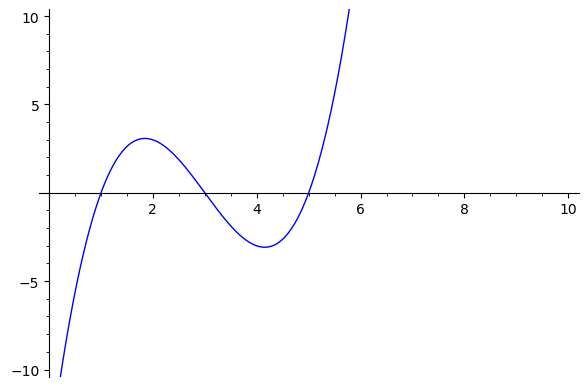

In [3]:
xmin, xmax = 0, 10
graphic = plot(f, (x, xmin, xmax), ymin = -10, ymax = 10)
show(graphic)

In [4]:
# Функция вычисляющая методом дихотомии точку пересечения с осью Ox
def dichotomy(f, a, b, eps=1e-5):
    if f(x = a) * f(x = b) > 0:
        return None
    median = (a + b) / 2.0
    if abs(f(x = median).n()) < eps:
        return median
    if f(x = median) * f(x = a) < 0:
        return dichotomy(f, a, median)
    else:
        return dichotomy(f, median, b)

In [5]:
# Функция вычисляющая методом Ньютона точку пересечения с осью Ox
def newton(f, a, b, eps=1e-5):
    x1 = a
    x2 = (a + b) / 2
    df = f.derivative()
    while abs(x2 - x1) >= eps:
        x1 = x2
        x2 = x1 - f(x = x1) / df(x = x1)
    if abs(f(x = x1)) <= eps:
        return x1
    else:
        return None

In [6]:
# Значения которые будут доступны для интерактивного взаимодействия
a = (0, 2, 0.5)
b = (0, 2, 0.5)
step = (1, 2, 1)

In [7]:
@interact
def interactive_functions(a = a, b = b, step = step):
    xmin = -2
    xmax = 8
    ymin = -5
    ymax = 7
    eps = 1e-5
    
    # Найдем значения корней методом дихотомии
    dich = [dichotomy(f, a, b, eps)]
    dich.append(dichotomy(f, a + step, b + step, eps))
    dich.append(dichotomy(f, a + 2 * step, b + 2 * step, eps))
    
    # Найдем значения корней методом Ньютона
    newt = [newton(f, a, b, eps)]
    newt.append(newton(f, a + step, b + step, eps))
    newt.append(newton(f, a + 2 * step, b + 2 * step, eps))
    
    
    # Три графика методом дихотомии
    gr = [plot(f, (x, xmin, xmax), ymin=ymin, ymax=ymax, aspect_ratio=1, figsize=[3,2], color='purple')]*3
    # Три графика методом Ньютона
    gr.extend([plot(f, (x, xmin, xmax), ymin=ymin, ymax=ymax, aspect_ratio=1, figsize=[3,2], color='blue')]*3)
    
    for i in range(len(gr)):
        if i <= 2 and dich[i] is not None:
            gr[i] += point((float(dich[i]), 0), color='black', aspect_ratio=1, size=30)
        if i > 2 and newt[i-3] is not None:
            gr[i] += point((float(newt[i-3]), 0), color='black', aspect_ratio=1, size=30)
    
    # Выведем массив графиков на один холст
    graphics_array([[gr[0], gr[1], gr[2]], [gr[3], gr[4], gr[5]]]).show(frame=True)
    
    #Печать на экран значений корней
    roots_str = "Корни полученные методом дихотомии: "
    for d in dich:
        if d is not None:
            roots_str += "{0:.1}".format(d) + " "
    roots_str += "\nКорни полученные методом Ньютона: "
    for n in newt:
        if n is not None:
            roots_str += str(round(float(n))) + " "
    print(roots_str)

Interactive function <function interactive_functions at 0x6fff63ddf680> with 3 widgets
  a: FloatSlider(value=…

In [8]:
# Результат полученный функцией solve
roots_by_solve = solve(f, x)
show("Корни, полученные при помощи solve: ", roots_by_solve)

'Корни, полученные при помощи solve: ' [x == 1, x == 5, x == 3]

Как можно заметить результат полученный методом дихотомии и Ньютона<br>
совпадает с результатом solve для каждого корня при правильном выборе границ a, b и шага step.<br>
Например при a = 0.5, b = 1.5, step = 2.<br>

<h2>Часть 2. Полиномы и gcd. Алгоритм Евклида. Тождество Безу.</h2>
<h2>Вариант 5.</h2>

In [9]:
R.<x> = PolynomialRing(QQ) # Будем работать в кольце рациональных чисел
f = 12*x^7 - 168*x^5 + 288*x^3 + 324*x
g = 4*x^6 - 28*x^4 + 20*x^3 + 48*x^2 - 60*x
show("f =	", f)
show("g =	", g)
# Найдем НОД при помощи встроенной функции gcd()
res_gcd = gcd(f, g)
print("НОД =", str(res_gcd))

'f =\t' 12*x^7 - 168*x^5 + 288*x^3 + 324*x

'g =\t' 4*x^6 - 28*x^4 + 20*x^3 + 48*x^2 - 60*x

НОД = x^3 - 3*x


In [10]:
# Функция вычисления коэффициентов тождества Безу и gcd(a,b)
def bezout(a, b):
    x, xx, y, yy = 1, 0, 0, 1
    while b:
        quotient = a // b
        residue = a % b
        a = b
        b = residue
        x, xx = xx, x - xx * quotient
        y, yy = yy, y - yy * quotient
    return (x, y, a)

In [11]:
# Результат в виде tuple трех элементов u, v, gcd(a,b)
bez = bezout(f, g)

In [12]:
# Получили gcd(a, b) - левую часть тождества
print("НОД =", f * bez[0] + bez[1] * g)

НОД = -1420804/4563*x^3 + 1420804/1521*x


In [13]:
# Получили gcd(a,b) - правую часть тождества
print("НОД =", bez[2])

НОД = -1420804/4563*x^3 + 1420804/1521*x


In [14]:
# Проверим тождество Безу f*u + v*g = gcd(f, g)
if (f * bez[0] + bez[1] * g) - bez[2] == 0:
    print("Тождество Безу выполняется.")
else:
    print("Тождество Безу не выполняется.")

Тождество Безу выполняется.


In [15]:
gcd_coef = res_gcd.coefficients()[0]
show("gcd, полученный при помощи функции gcd(): ", res_gcd / gcd_coef)
bez_coef = bez[2].coefficients()[0]
show("gcd, полученный при помощи тождества Безу: ", bez[2] / bez_coef)

'gcd, полученный при помощи функции gcd(): ' -1/3*x^3 + x

'gcd, полученный при помощи тождества Безу: ' -1/3*x^3 + x

Полученный результат совпал с НОД, значит найденные коэффициенты верны. Алгоритм работает корректно.<br>

<h2>Часть 3. Приведение поверхности второго порядка к каноническому виду.</h2>
<h2>Вариант 10.</h2>
<br />
Решение см. в файле cas_lab2_part3.tex<br>